In [ ]:
import pandas as pd

# Array
import numpy as np

# Decompress the file
import gzip

# Visualizations
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import matplotlib.colors as colors
%matplotlib inline

# Datetime
from datetime import datetime

## Warnings
import warnings
from scipy import stats
warnings.filterwarnings('ignore')

In [ ]:
def parse(path):
    g = gzip.open(path, 'rb')
    for l in g:
        yield eval(l)

def getDF(path):
    i = 0
    df = {}
    for d in parse(path):
        df[i] = d
        i += 1
    return pd.DataFrame.from_dict(df, orient='index')

df = getDF('reviews_Beauty_10.json.gz')

In [ ]:
df.shape

(28798, 9)

In [ ]:
df.head()


,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A6VPK7X53QNAQ,B0000CC64W,"AmazonDiva ""Keep Calm and Carry On.""","[5, 5]","I am a devotee to this serum, it does wonders ...",5.0,If I had to choose only one product to take ca...,1245283200,"06 18, 2009"
1,A3CHMHGSJSQ02J,B0000CC64W,Anon. A. Non,"[2, 2]","As a woman nearing 50, I need all the help I c...",5.0,Makes my skin lovely and smooth,1358467200,"01 18, 2013"
2,A1V1EP514B5H7Y,B0000CC64W,asiana,"[0, 0]",I've used this regenerating serum for more tha...,5.0,Works well at a reasonable price,1322524800,"11 29, 2011"
3,A1X2LENOF84LCQ,B0000CC64W,"D ""D""","[62, 75]",I have tried so many products to just be total...,4.0,This does work ladies,1113350400,"04 13, 2005"
4,A2PATWWZAXHQYA,B0000CC64W,Farnoosh Brock,"[1, 1]",I love Oil of Olay. My primary moisturizer is ...,1.0,Did not like the feel/texture of this serum,1387584000,"12 21, 2013"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28798 entries, 0 to 28797
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviewerID      28798 non-null  object 
 1   asin            28798 non-null  object 
 2   reviewerName    28576 non-null  object 
 3   helpful         28798 non-null  object 
 4   reviewText      28798 non-null  object 
 5   overall         28798 non-null  float64
 6   summary         28798 non-null  object 
 7   unixReviewTime  28798 non-null  int64  
 8   reviewTime      28798 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 3.2+ MB


In [ ]:
df.describe()

,overall,unixReviewTime
count,28798.000000,2.879800e+04
mean,4.168137,1.362445e+09
std,0.993920,4.214377e+07
min,1.000000,1.113350e+09
25%,4.000000,1.351123e+09
50%,4.000000,1.366070e+09
75%,5.000000,1.395274e+09
max,5.000000,1.406074e+09


In [ ]:
df['overall'][df['overall']<1].sum()

np.float64(0.0)

In [ ]:
df['overall'][df['overall']>5].sum()

np.float64(0.0)

In [ ]:
# Customer totals for each rating
df['overall'].value_counts()

,count
overall,
5.0,13766
4.0,8808
3.0,4110
2.0,1528
1.0,586


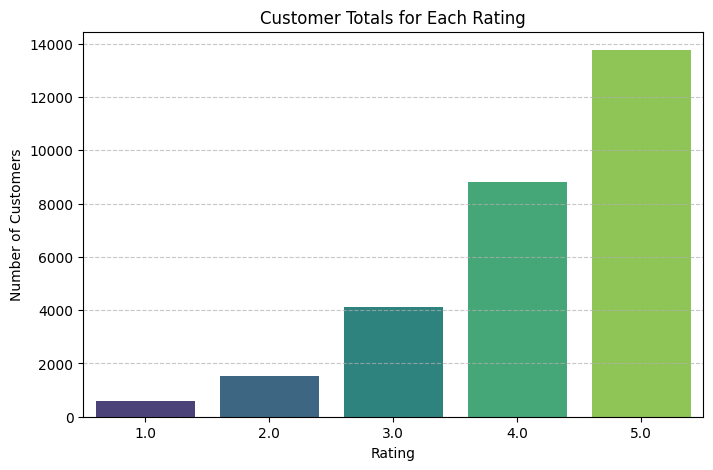

In [ ]:

rating_counts = df['overall'].value_counts().sort_index()  # Sort by rating (e.g., 1 to 5)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='viridis')

plt.title('Customer Totals for Each Rating')
plt.xlabel('Rating')
plt.ylabel('Number of Customers')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
# Check for missing values
df.isnull().sum()

,0
reviewerID,0
asin,0
reviewerName,222
helpful,0
reviewText,0
overall,0
summary,0
unixReviewTime,0
reviewTime,0


In [ ]:
# Drop missing customers who don't give their names
df2 = df.dropna(axis=0)

In [ ]:
# Customer totals for each rating (after drop missing values)
df2['overall'].value_counts()

,count
overall,
5.0,13683
4.0,8742
3.0,4067
2.0,1508
1.0,576


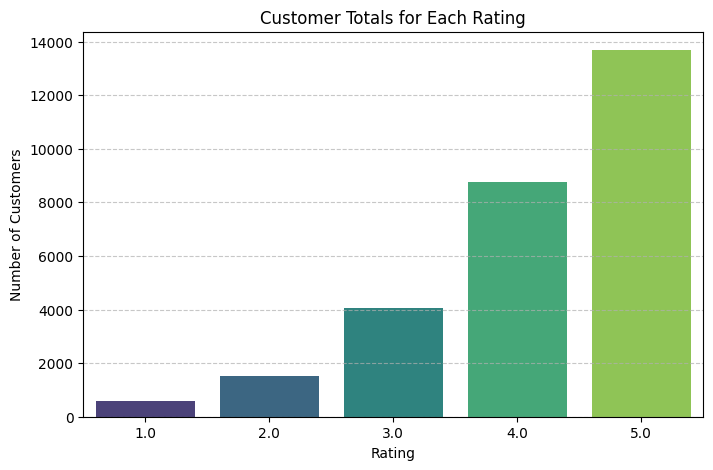

In [ ]:
rating_counts = df2['overall'].value_counts().sort_index()  # Sort by rating (e.g., 1 to 5)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='viridis')

plt.title('Customer Totals for Each Rating')
plt.xlabel('Rating')
plt.ylabel('Number of Customers')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
# Concatenate 'reviewText' and 'summary' as review_text and drop them
df2['review_text'] = df[['summary', 'reviewText']].apply(lambda x: " ".join(str(y) for y in x if str(y) != 'nan'), axis = 1)
df2 = df2.drop(['reviewText', 'summary'], axis = 1)
df2.head()

,reviewerID,asin,reviewerName,helpful,overall,unixReviewTime,reviewTime,review_text
0,A6VPK7X53QNAQ,B0000CC64W,"AmazonDiva ""Keep Calm and Carry On.""","[5, 5]",5.0,1245283200,"06 18, 2009",If I had to choose only one product to take ca...
1,A3CHMHGSJSQ02J,B0000CC64W,Anon. A. Non,"[2, 2]",5.0,1358467200,"01 18, 2013",Makes my skin lovely and smooth As a woman nea...
2,A1V1EP514B5H7Y,B0000CC64W,asiana,"[0, 0]",5.0,1322524800,"11 29, 2011",Works well at a reasonable price I've used thi...
3,A1X2LENOF84LCQ,B0000CC64W,"D ""D""","[62, 75]",4.0,1113350400,"04 13, 2005",This does work ladies I have tried so many pro...
4,A2PATWWZAXHQYA,B0000CC64W,Farnoosh Brock,"[1, 1]",1.0,1387584000,"12 21, 2013",Did not like the feel/texture of this serum I ...


In [ ]:
# Split 'helpful' column into 'neg_feedback' and 'pos_feedback' and drop it at the end

list_positive = []
list_negative = []

for help in df2['helpful']:
    list_positive.append(help[0])
    list_negative.append(help[1] - help[0])

# Positive Feedback (Supporting reviewer's idea and find it useful)
df2['pos_feedback'] = list_positive

# Negative Feedback (Finding reviewer's idea useless and not supporting it)
df2['neg_feedback'] = list_negative

# Drop redundant 'helpful' column
df2 = df2.drop('helpful', axis = 1)
df2.head()

,reviewerID,asin,reviewerName,overall,unixReviewTime,reviewTime,review_text,pos_feedback,neg_feedback
0,A6VPK7X53QNAQ,B0000CC64W,"AmazonDiva ""Keep Calm and Carry On.""",5.0,1245283200,"06 18, 2009",If I had to choose only one product to take ca...,5,0
1,A3CHMHGSJSQ02J,B0000CC64W,Anon. A. Non,5.0,1358467200,"01 18, 2013",Makes my skin lovely and smooth As a woman nea...,2,0
2,A1V1EP514B5H7Y,B0000CC64W,asiana,5.0,1322524800,"11 29, 2011",Works well at a reasonable price I've used thi...,0,0
3,A1X2LENOF84LCQ,B0000CC64W,"D ""D""",4.0,1113350400,"04 13, 2005",This does work ladies I have tried so many pro...,62,13
4,A2PATWWZAXHQYA,B0000CC64W,Farnoosh Brock,1.0,1387584000,"12 21, 2013",Did not like the feel/texture of this serum I ...,1,0


In [ ]:
# Classify ratings as good
good_rate = len(df2[df2['overall'] > 3])
neut_rate = len(df2[df2['overall'] == 3])
bad_rate = len(df2[df2['overall'] < 3])

# Printing rates and their total numbers
print ('Good ratings : {} reviews for beauty products'.format(good_rate))
print ('Neutral ratings : {} reviews for beauty products'.format(neut_rate))
print ('Bad ratings : {} reviews for beauty products'.format(bad_rate))

Good ratings : 22425 reviews for beauty products
Neutral ratings : 4067 reviews for beauty products
Bad ratings : 2084 reviews for beauty products


In [ ]:
# Apply the new classification to the ratings column
df2['rating_class'] = df2['overall'].apply(lambda x: 'bad' if x < 3 else('good' if x > 3 else 'neutral'))
df2.head()


,reviewerID,asin,reviewerName,overall,unixReviewTime,reviewTime,review_text,pos_feedback,neg_feedback,rating_class
0,A6VPK7X53QNAQ,B0000CC64W,"AmazonDiva ""Keep Calm and Carry On.""",5.0,1245283200,"06 18, 2009",If I had to choose only one product to take ca...,5,0,good
1,A3CHMHGSJSQ02J,B0000CC64W,Anon. A. Non,5.0,1358467200,"01 18, 2013",Makes my skin lovely and smooth As a woman nea...,2,0,good
2,A1V1EP514B5H7Y,B0000CC64W,asiana,5.0,1322524800,"11 29, 2011",Works well at a reasonable price I've used thi...,0,0,good
3,A1X2LENOF84LCQ,B0000CC64W,"D ""D""",4.0,1113350400,"04 13, 2005",This does work ladies I have tried so many pro...,62,13,good
4,A2PATWWZAXHQYA,B0000CC64W,Farnoosh Brock,1.0,1387584000,"12 21, 2013",Did not like the feel/texture of this serum I ...,1,0,bad


In [ ]:
# Drop 'reviewName' and 'unixReviewTime'columns
df2 = df2.drop(['reviewerName', 'unixReviewTime'], axis = 1)
df2.head()


,reviewerID,asin,overall,reviewTime,review_text,pos_feedback,neg_feedback,rating_class
0,A6VPK7X53QNAQ,B0000CC64W,5.0,"06 18, 2009",If I had to choose only one product to take ca...,5,0,good
1,A3CHMHGSJSQ02J,B0000CC64W,5.0,"01 18, 2013",Makes my skin lovely and smooth As a woman nea...,2,0,good
2,A1V1EP514B5H7Y,B0000CC64W,5.0,"11 29, 2011",Works well at a reasonable price I've used thi...,0,0,good
3,A1X2LENOF84LCQ,B0000CC64W,4.0,"04 13, 2005",This does work ladies I have tried so many pro...,62,13,good
4,A2PATWWZAXHQYA,B0000CC64W,1.0,"12 21, 2013",Did not like the feel/texture of this serum I ...,1,0,bad


In [ ]:
# Convert time object to datetime and create a new column named 'time'
df2['time'] = df2.reviewTime.str.replace(',', "")
df2['time'] = pd.to_datetime(df2['time'], format = '%m %d %Y')

# Drop redundant 'reviewTime' column
df2 = df2.drop('reviewTime', axis = 1)
df2.head()

,reviewerID,asin,overall,review_text,pos_feedback,neg_feedback,rating_class,time
0,A6VPK7X53QNAQ,B0000CC64W,5.0,If I had to choose only one product to take ca...,5,0,good,2009-06-18
1,A3CHMHGSJSQ02J,B0000CC64W,5.0,Makes my skin lovely and smooth As a woman nea...,2,0,good,2013-01-18
2,A1V1EP514B5H7Y,B0000CC64W,5.0,Works well at a reasonable price I've used thi...,0,0,good,2011-11-29
3,A1X2LENOF84LCQ,B0000CC64W,4.0,This does work ladies I have tried so many pro...,62,13,good,2005-04-13
4,A2PATWWZAXHQYA,B0000CC64W,1.0,Did not like the feel/texture of this serum I ...,1,0,bad,2013-12-21


In [ ]:
# Check the 'time' data type with a sample observation
type(df2.time[110])

pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
# Rename the columns
df2.columns = ['customer', 'product', 'rating', 'review_text', 'pos_feedback', 'neg_feedback', 'rating_class', 'time']

# Sample observation
df2.sample()

,customer,product,rating,review_text,pos_feedback,neg_feedback,rating_class,time
22433,AX9C10JD538D9,B00GLS5DKM,4.0,It is a good lotion Jergens BB Body Cream stat...,3,2,good,2014-03-07


In [ ]:
# Read statistic summary of numeric variables
df2.describe()

,rating,pos_feedback,neg_feedback,time
count,28576.000000,28576.000000,28576.000000,28576
mean,4.170493,0.948488,0.324888,2013-03-04 10:50:03.359462656
min,1.000000,0.000000,0.000000,2005-04-13 00:00:00
25%,4.000000,0.000000,0.000000,2012-10-23 00:00:00
50%,4.000000,0.000000,0.000000,2013-04-17 00:00:00
75%,5.000000,1.000000,0.000000,2014-03-20 00:00:00
max,5.000000,549.000000,52.000000,2014-07-23 00:00:00
std,0.992277,6.829651,1.105870,NaN


In [ ]:
# Customer totals for each rating
df2['rating'].value_counts()

,count
rating,
5.0,13683
4.0,8742
3.0,4067
2.0,1508
1.0,576


In [ ]:
# Customer totals for each rating class
df2['rating_class'].value_counts()

,count
rating_class,
good,22425
neutral,4067
bad,2084


In [ ]:
# Print the number of positive feedback
pos = len(df2[df2['pos_feedback'] > 0])
print('Number of positive feedbacks: {}'.format(pos))

# Print the number of negative feedback
neg = len(df2[df2['neg_feedback'] > 0])
print('\nNumber of negative feedbacks: {}'.format(neg))

# Print the number of no 'helpful' feedback
total = len(df2)
print('\nNumber of no helpful feedbacks: {}'.format(total - (pos + neg)))


Number of positive feedbacks: 8397

Number of negative feedbacks: 6078

Number of no helpful feedbacks: 14101


In [ ]:
# Statistics of non-numeric variables

# Number of unique customers
print('\nNumber of unique customers : {}'.format(len(df2['customer'].unique())))

# Number of unique products
print('\nNumber of unique products : {}'.format(len(df2['product'].unique())))

# Review number per unique customer
print('\nReview per customer: {}'.format((len(df2)/len(df2['customer'].unique()))))

# Review number per unique product
print('\nReview per product: {}'.format((len(df2)/len(df2['product'].unique()))))


Number of unique customers : 1340

Number of unique products : 733

Review per customer: 21.32537313432836

Review per product: 38.9849931787176


Descriptive Statistic Summary:

- Rating Status:

28576 customer gives ratings and mean of the ratings is 4.17, which means that customers prefer to give high ratings for products. Standard deviation and percentiles also show that 1 and 2 ratings for products are rare. To be able to predict the ratings reasonably, we classified them as 'good', 'neutral', and 'bad' above.

According to the statistics on rating stars:

576 customers give 1 star

1508 customers give 2 stars

4067 customers give 3 stars

8742 customers give 4 stars

13683 customers give 5 stars

On the other hand, if we look for the rating class, the picture is look like below.

2084 customers give bad ratings

4067 customers give neutral ratings

22425 customers give good ratings

- Feedback Status

8397 customers find the given reviews logical and totally agree with them. They give positive feedbacks. The mean 0.9 and standard deviation is 6.8 whereas the highest positive feedback number for reviews is 549. That shows we may have some outliers in the dataset.

6078 customers find the given reviews useless and don't aggree with the them. They give negative feedbacks. The mean 0.3 and standard deviation is 1.1 whereas the highest negative feedback number for reviews is 52.

On the other hand 14101 customers don't give either positive or negative feedbacks for reviews.

- Non-numeric variables statistics:

We have 1340 unique customers and 733 products in this dataset. Each customers averagely give 21 reviews for products and on the other hand, there is averagely 40 reviews for each product in the website.

On exploratory data analysis, we will check if there is a case for outliers by visualizing data.

# Preprocessing the **new_text**

In [ ]:
import spacy
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize, regexp_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize.toktok import ToktokTokenizer
import re
from bs4 import BeautifulSoup
#from contractions import CONTRACTION_MAP
import unicodedata
tokenizer = ToktokTokenizer()
nlp = spacy.load('en_core_web_sm')

In [ ]:
CONTRACTION_MAP = {
    "can't": "cannot",
    "won't": "will not",
    "it's": "it is",
    "I'm": "I am",
    "don't": "do not",
    # Add more if needed...
}



Removing HTML tags

We will write a function to remove the HTML tags which typically does not add much value towards understanding and analyzing text.

### New Section

In [ ]:
def strip_html_tags(text):

    "Removes html tags in the text"

    soup = BeautifulSoup(text, "html.parser")
    stripped_text = soup.get_text()
    return stripped_text

## **Removing accented characters**

We will write a function to convert and standardize accented characters/letters into ASCII characters.

In [ ]:
def remove_accented_chars(text):

    "Removes and standardize accented characters/letters"

    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

### **Expanding Contractions**

We will write a function to convert each contraction to its expanded, orginal form in order to help with text standardization.

In [ ]:
def expand_contractions(text, contraction_mapping=CONTRACTION_MAP):

    "Convert contractions into their original forms"

    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())),
                                      flags=re.IGNORECASE|re.DOTALL)
    def expand_match(contraction):
      match = contraction.group(0)
      first_char = match[0]

      expanded = contraction_mapping.get(match)
      if not expanded:
          expanded = contraction_mapping.get(match.lower())

      if expanded:
          return first_char + expanded[1:]
      else:
          return match

    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text

### **Removing Special Characters**

We will use simple regular expressions(regexes) to remove special characters and symbols which are usually non-alphanumeric characters or even occasional numeric characters.

In [ ]:
def remove_special_characters(text, remove_digits=False):

    "Remove special characters/symbols"

    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    return text

### **Lemmatization**

We will remove word affixes to get to the base form of a word, known as root word.

In [ ]:
def lemmatize_text(text):
    text = nlp(text)
    text = ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])
    return text

lemmatize_text("My system keeps crashing! the car crashed yesterday, ours crashes daily")

'my system keep crash ! the car crash yesterday , our crash daily'

**Removing stopwords**

We will write a function to remove stopwords which have little or no significance in the text.

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Instantiate Tokenizer
tokenizer = ToktokTokenizer()

# Create stopword list
stopword_list = nltk.corpus.stopwords.words('english')

# 'no' and 'not' may give us information so those are removed from stop list
stopword_list.remove('no')
stopword_list.remove('not')

In [ ]:
def remove_stopwords(text, is_lower_case=False):

    "Remove stopwords in the text except 'no' and 'not'"

    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text

**Building a Text Normalizer**

Based on the functions which we have written above and also with additional text correction techniques, we will build a text normalizer in order to help us to preproces the new_text document.

In [ ]:
def normalize_corpus(doc, html_stripping=True, contraction_expansion=True,
                     accented_char_removal=True, text_lower_case=True,
                     text_lemmatization=True, special_char_removal=True,
                     stopword_removal=True, remove_digits=True):

    # strip HTML
    if html_stripping:
        doc = strip_html_tags(doc)

    # remove accented characters
    if accented_char_removal:
        doc = remove_accented_chars(doc)

    # expand contractions
    if contraction_expansion:
        doc = expand_contractions(doc)

    # lowercase the text
    if text_lower_case:
        doc = doc.lower()

    # remove extra newlines
    doc = re.sub(r'[\r|\n|\r\n]+', ' ',doc)

    # lemmatize text
    if text_lemmatization:
        doc = lemmatize_text(doc)

    # remove special characters and\or digits
    if special_char_removal:
        # insert spaces between special characters to isolate them
        special_char_pattern = re.compile(r'([{.(-)!}])')
        doc = special_char_pattern.sub(" \\1 ", doc)
        doc = remove_special_characters(doc, remove_digits=remove_digits)

    # remove extra whitespace
    doc = re.sub(' +', ' ', doc)

    # remove ' (apostrophe) sign
    doc = re.sub(r"'", r'', doc)

    # remove stopwords
    if stopword_removal:
        doc = remove_stopwords(doc, is_lower_case=text_lower_case)

    return doc

Applying text normalizer to "review_text"
**bold text**

In [ ]:
# Create a new column for cleaned text
df2['clean_text'] = df2['review_text'].map(lambda doc: normalize_corpus(doc))

KeyboardInterrupt: 

Applying tokenizer to create tokens for the clean text


In [ ]:
# Apply tokenizer to create a new column named as tokens which consists of the list of the reviews
tokenizer = RegexpTokenizer(r'\w+')
df2["tokens"] = df2["clean_text"].apply(tokenizer.tokenize)
df2.head()

In [ ]:
# Tokens status
all_words = [word for tokens in df2["tokens"] for word in tokens]
sentence_lengths = [len(tokens) for tokens in df2["tokens"]]
vocabulary = sorted(list(set(all_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_words), len(vocabulary)))
print("Max review length is (word based) %s" % max(sentence_lengths))
print("Max review length is (word based) %s" % min(sentence_lengths))

In [ ]:
df2.to_csv('cleaned_review_beauty.csv', sep = ',', encoding = 'utf-8', index = False)